In [2]:
!pipinstall pandas matplotlib seaborn

zsh:1: command not found: pipinstall


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:


# Step 2: Load the dataset
titanic_df = pd.read_csv("titanic.csv")

In [5]:


# Step 3: Data Cleaning
# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:")
print(missing_values)






Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Step 7: Handle Missing Values
# For 'Age', we will use mean 
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# For 'Cabin', since a large portion of data is missing (687 out of 891), we will drop this column
titanic_df.drop('Cabin', axis=1, inplace=True)

# For 'Embarked', since only 2 values are missing, we will impute with the most common value
most_common_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(most_common_embarked)

# Check if missing values are handled
print("Missing Values After Imputation:")
print(titanic_df.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [7]:




# Step 4: Data Exploration
# Explore demographics
print("Demographics:")
print(titanic_df['Sex'].value_counts())
print(titanic_df['Age'].describe())
# Explore ticket fares
print("Ticket Fares:")
print(titanic_df['Fare'].describe())

# Explore family relations
print("Family Relations:")
print(titanic_df['SibSp'].value_counts())
print(titanic_df['Parch'].value_counts())




Demographics:
Sex
male      577
female    314
Name: count, dtype: int64
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
Ticket Fares:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Family Relations:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


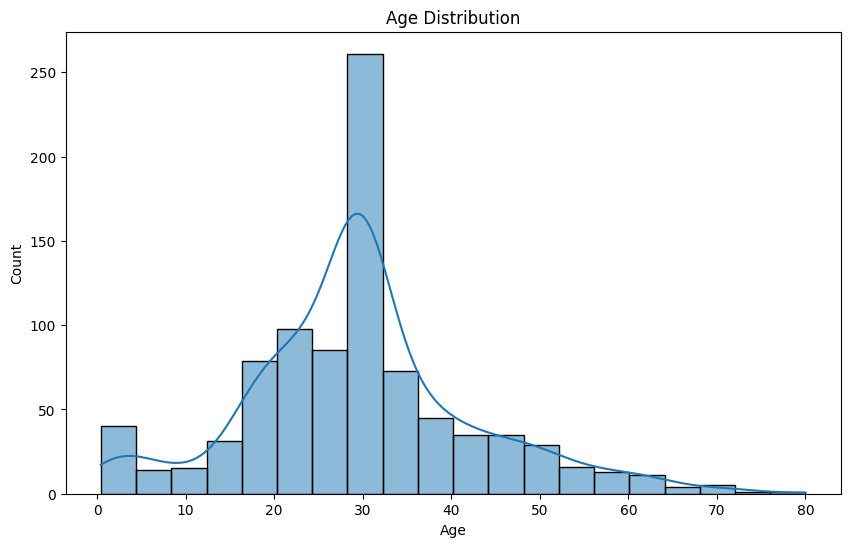

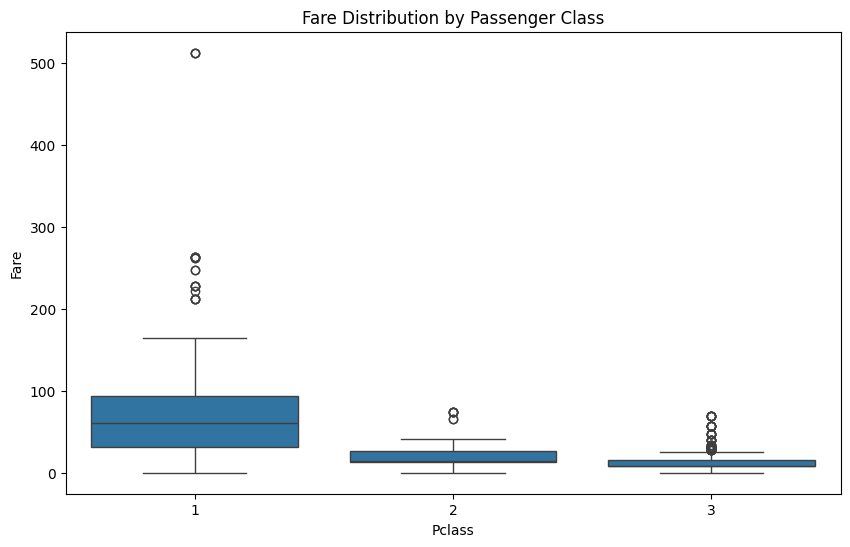

In [8]:




# Step 5: Data Visualization
# Example visualizations
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title("Fare Distribution by Passenger Class")
plt.show()




In [10]:


# Step 6: Statistical Analysis
# Example: Correlation between age and fare
print("Correlation between Age and Fare:")
print(titanic_df[['Age', 'Fare']].corr())




Correlation between Age and Fare:
           Age      Fare
Age   1.000000  0.091566
Fare  0.091566  1.000000


let's summarize the results of the data exploration and analysis

Demographics:
- There were 577 male passengers and 314 female passengers onboard the Titanic.
- The average age of passengers was approximately 30 years, with a minimum age of 1 years and a maximum age of 80 years. The distribution appears to be slightly right-skewed.
   
Ticket Fares:
- The average fare paid by passengers was approximately $32.20, with a minimum fare of $0.00 and a maximum fare of $512.33. The fare distribution seems to be right-skewed, indicating that most passengers paid lower fares.
   
Family Relations:
- The 'SibSp' column represents the number of siblings/spouses aboard, and the 'Parch' column represents the number of parents/children aboard.
- The majority of passengers were traveling alone (537 passengers had no siblings/spouses aboard and 678 had no parents/children aboard).
- There were also passengers traveling with various numbers of siblings/spouses and parents/children, with the maximum values being 8 siblings/spouses and 6 parents/children.
   
4. Correlation between Age and Fare:
- The correlation coefficient between age and fare is approximately 0.0916, indicating a very weak positive correlation between the two variables. This suggests that there is little relationship between a passenger's age and the fare they paid.



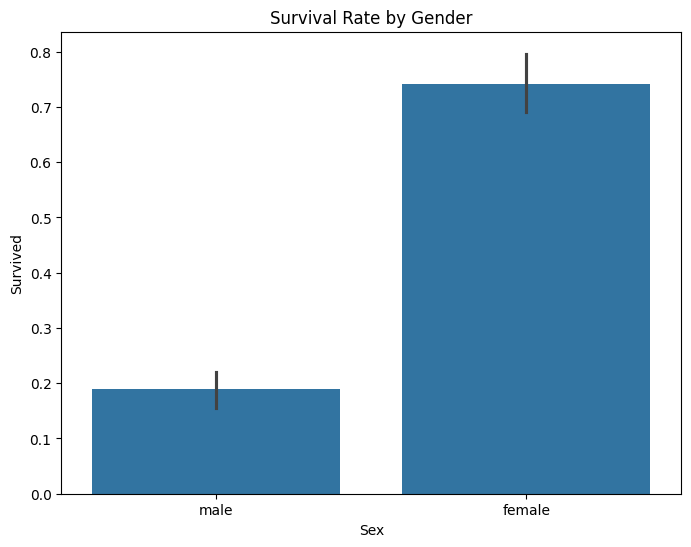

In [11]:
# Visualize Survival Rates by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title("Survival Rate by Gender")
plt.show()


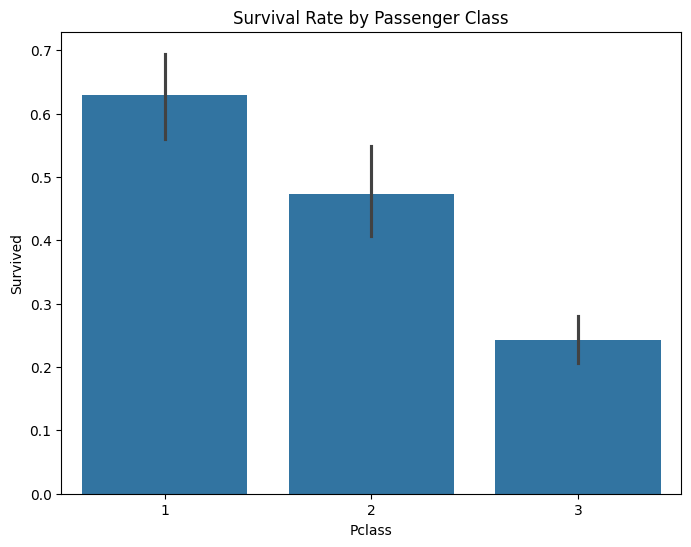

In [12]:
# Visualize Survival Rates by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title("Survival Rate by Passenger Class")
plt.show()


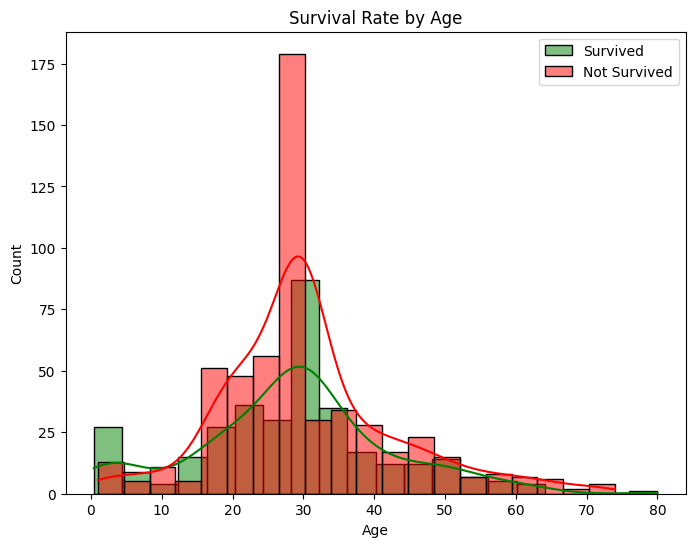

In [13]:
# Visualize Survival Rates by Age
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.title("Survival Rate by Age")
plt.legend()
plt.show()

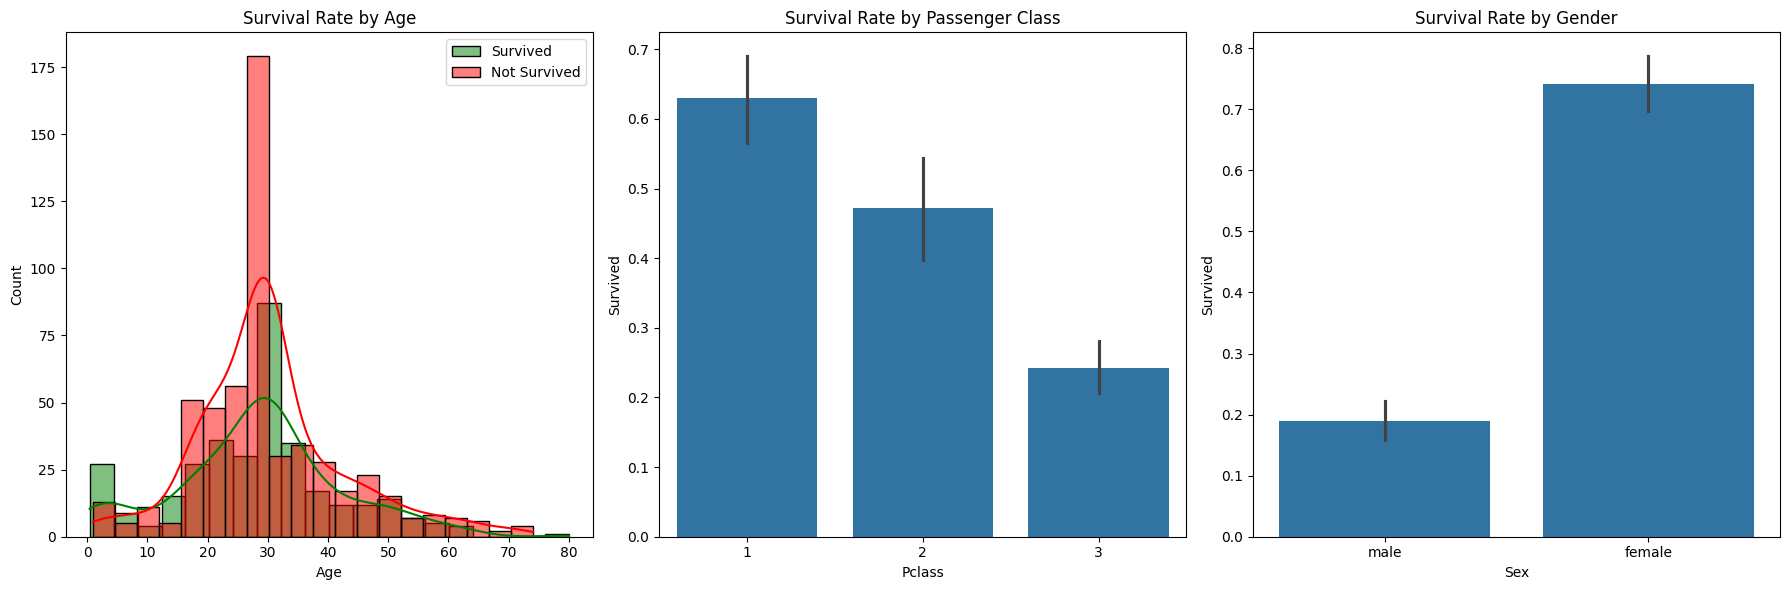

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Survival Rates by Age
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived', ax=axs[0])
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived', ax=axs[0])
axs[0].set_title("Survival Rate by Age")
axs[0].legend()

# Second plot: Survival Rates by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ax=axs[1])
axs[1].set_title("Survival Rate by Passenger Class")

# Third plot: Survival Rates by Gender
sns.barplot(x='Sex', y='Survived', data=titanic_df, ax=axs[2])
axs[2].set_title("Survival Rate by Gender")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
